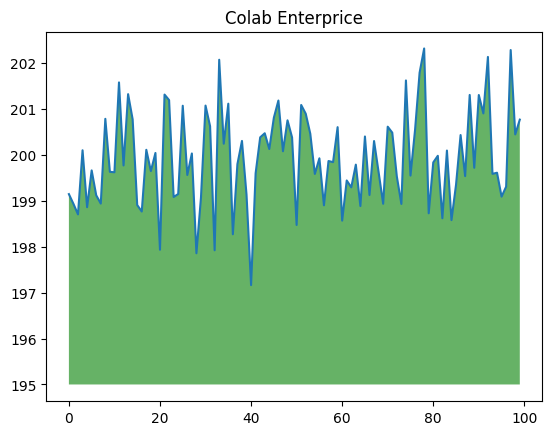

In [ ]:
import numpy as np
from matplotlib import pyplot as plt


# Genera 100 números aleatorios con distribución normal estándar (np.random.randn(100)), pero sumando 200 a cada uno para centrar los valores cerca de 200.

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Colab Enterprice")
plt.show()

#### ¿Qué vas a ver en la gráfica?

Una línea que va mostrando valores cercanos a 200 a lo largo del eje X (0 a 99).

Áreas verdes rellenas debajo de la línea cuando el valor de ys está por encima de 195

Visualizar claramente las partes donde la variable **ys** está sobre un umbral (195).

Se **crear un ejemplo rápido de visualización de datos** usando Python, Numpy y Matplotlib.

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

# Importa la librería oficial de BigQuery
# Crea un cliente autenticado para conectarte y trabajar con BigQuery (consultas, carga de datos, administración).

from google.cloud import bigquery
bq = bigquery.Client()

In [ ]:
# Crea el cliente de BigQuery

client = bigquery.Client()

# Trae las primeras 1000 filas de la tabla pública de cobertura móvil en Cataluña (2015-2017).
query = """SELECT * FROM `bigquery-public-data.catalonian_mobile_coverage_eu.mobile_data_2015_2017` LIMIT 1000"""

# job representa el trabajo de consulta, que puede tardar unos segundos en completarse.
# Convierte el resultado a DataFrame de Pandas

job = client.query(query)
df = job.to_dataframe()


# Resumen: conecta a BigQuery, ejecuta la consulta y obtiene los resultados en un DataFrame listo para análisis en Python

In [ ]:
# Ese código es otra forma de hacer consultas a BigQuery directamente desde un notebook (Colab o Jupyter) 
# usando la “cell magic” %%bigquery.



%%bigquery df
SELECT *
FROM `bigquery-public-data.catalonian_mobile_coverage_eu.mobile_data_2015_2017`

Query is running:   0%|          |

Downloading:   0%|          |

💡 Ventaja de **%%bigquery** sobre c**lient.query()**:

No necesitas crear explícitamente un cliente ni llamar a to_dataframe().

Ideal para notebooks interactivos.

In [ ]:
# Muestra las primeras cinco filas del DataFrame de Pandas

df.head()

,date,hour,lat,long,signal,network,operator,status,description,net,speed,satellites,precission,provider,activity,downloadSpeed,uploadSpeed,postal_code,town_name,position_geom
0,2015-02-05,17:51:17,41.42831,2.20016,17,null,null,2,STATE_EMERGENCY_ONLY,3G,13.1,1.0,58.0,fused,UNKNOWN,NaN,NaN,080193,Barcelona,POINT(2.20016 41.42831)
1,2017-12-06,03:45:10,42.18322,2.49385,17,orange,PARLEM,2,STATE_EMERGENCY_ONLY,3G,3.2,7.0,16.0,gps,ON_FOOT,NaN,NaN,171143,Olot,POINT(2.49385 42.18322)
2,2017-12-06,11:59:24,41.51807,1.21586,7,Eroski Movil,Eroski Movil,2,STATE_EMERGENCY_ONLY,3G,2.9,7.0,15.0,gps,ON_FOOT,NaN,NaN,431016,Passanant i Belltall,POINT(1.21586 41.51807)
3,2017-01-22,12:16:53,41.69749,0.59592,10,orange,adamo,2,STATE_EMERGENCY_ONLY,4G,6.9,7.0,4.0,gps,ON_BICYCLE,NaN,NaN,251898,Rosselló,POINT(0.59592 41.69749)
4,2016-12-24,19:59:59,41.62624,0.62260,20,orange,adamo,2,STATE_EMERGENCY_ONLY,4G,3.7,0.0,14.0,gps,STILL,NaN,NaN,251207,Lleida,POINT(0.6226 41.62624)


In [ ]:
# Obtén información sobre el DataFrame de Pandas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11744914 entries, 0 to 11744913
Data columns (total 20 columns):
 #   Column         Dtype  
---  ------         -----  
 0   date           dbdate 
 1   hour           dbtime 
 2   lat            float64
 3   long           float64
 4   signal         Int64  
 5   network        object 
 6   operator       object 
 7   status         Int64  
 8   description    object 
 9   net            object 
 10  speed          float64
 11  satellites     float64
 12  precission     float64
 13  provider       object 
 14  activity       object 
 15  downloadSpeed  float64
 16  uploadSpeed    float64
 17  postal_code    object 
 18  town_name      object 
 19  position_geom  object 
dtypes: Int64(2), dbdate(1), dbtime(1), float64(7), object(9)
memory usage: 1.8+ GB


In [ ]:
# Obtén estadísticas sobre el DataFrame de Pandas

df.describe()

,lat,long,signal,status,speed,satellites,precission,downloadSpeed,uploadSpeed
count,1.174491e+07,1.174491e+07,11744914.0,11744914.0,1.174491e+07,1.174369e+07,1.174369e+07,0.0,0.0
mean,4.120760e+01,7.851310e-01,13.262954,1.778794,2.643376e+01,9.795352e+05,4.636630e+07,NaN,NaN
std,3.481886e+00,9.397493e+00,7.467304,0.633283,3.553885e+01,3.356759e+09,9.644288e+10,NaN,NaN
min,-7.703775e+01,-1.787292e+02,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN
25%,4.138028e+01,1.690790e+00,8.0,2.0,1.400000e+00,2.000000e+00,1.000000e+01,NaN,NaN
50%,4.148911e+01,2.123840e+00,13.0,2.0,7.400000e+00,5.000000e+00,1.700000e+01,NaN,NaN
75%,4.169777e+01,2.245140e+00,18.0,2.0,4.080000e+01,7.000000e+00,3.000000e+01,NaN,NaN
max,6.343513e+01,1.396410e+02,99.0,3.0,2.550000e+02,1.150330e+13,2.415039e+14,NaN,NaN


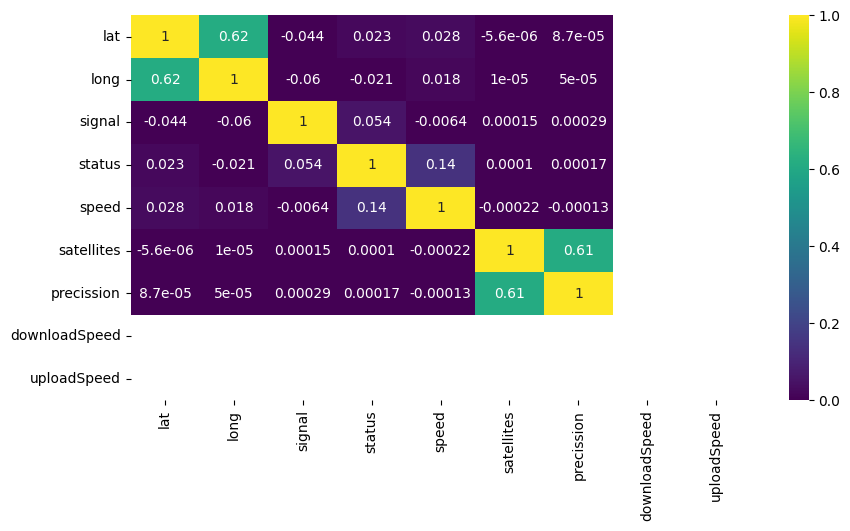

In [ ]:

# Traza una correlación con Seaborn

numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, vmin=0, vmax=1, cmap='viridis')
plt.show()

In [ ]:
# Escribe una consulta en SQL para seleccionar campos específicos de un conjunto de datos de BigQuery

%%bigquery df2
SELECT signal, status
FROM `bigquery-public-data.catalonian_mobile_coverage_eu.mobile_data_2015_2017`

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
# Obtén las primeras cinco filas de los nuevos campos

df2.head()

,signal,status
0,55,2
1,52,2
2,55,2
3,51,0
4,60,2
